# Linear Regression


by   
[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)  
[Konstantin Ziegler (konstantin.ziegler@uni-passau.de)](http://zieglerk.net)  
Jörg Schlötterer (joerg.schloetterer@uni-passau.de)

with examples taken from the [scikit-learn documentation](http://scikit-learn.org/stable/)

__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/) (CC BY 3.0)

## Motivation

Given the car example below, how can we predict the price from customer group, horsepower and mileage?

|Customer Group ($x_1$)|  Mileage ($x_2$) | Power ($x_3$) | Price ($x_4$) |
|-|-|-|-|-|
|Family|  50,000 | 132 | 5,000|
|Upper Class |  10,000 | 332 | 50,000|
|Family |  80,000 | 90 | 15,000|
|$\ldots$| $\ldots$  | $\ldots$| $\ldots$ | 
|?|  500 | 4000 | ?|

## Notations and Model
Some notations. So lets denote

- every attribute with $x^{(j)}$ where $j$ is the index of the column/attribute. 
- $x_i$ as the attribute vector of the $i^{(th)}$ example, i.e. $x_i=(1, x^{(1)}, x^{(2)}, x^{(3)})$ (Note that we excluded $x_{(0)}$ for *this* example and set the first dimension to 1 as constant).

Now lets assume the price is a linear combination of power and mileage. So we can write

$$
x^{{4}}= w^{(0)} + w^{(1)} * x^{(1)} + w^{(2)} * x^{(2)}  + w^{(3)} * x^{(3)} = w^T \cdot x
$$

with $w$ being called a weight vector resp. our **model**. Note that the first dimension represents the offset/bias.

To differentiate between dependent and independent variables a linear model is often written as:

$$
y_i = w^T \cdot x_i
$$
where subscript $i$ denotes the $i^{(th)}$ example.

<div class = "alert alert-info">
How would you adjust the weights for estimating the price?
</div>

To quantify the amount of increase/decrease, we can formalize the cost of predicting $y_i$ wrong as sum of the squared error (SSE).

$$
cost(w,X) = \sum_{y_i, x_i \in X}(w^T \cdot x_i-y_i)^2 = \sum_{y_i, x_i \in X}error_i(w)^2
$$ 

The optimal $w$ is obtained when the cost becomes minimal, i.e.

$$
\frac{\partial cost(w,X)}{\partial w} = 0
$$ 




Analytical Solution:
$$ w=(X^TX)^{-1}X^Ty $$

**Observation**

1. if $y_i > w^T \cdot x_i $ &nbsp; the weights have been too low and need to be increased. 
2. if $y_i < w^T \cdot x_i $ &nbsp; the weights have been too high and need to be decreased. 
3. if $y_i < w^T \cdot x_i $ and $x_i^{(k)}>x_i^{(j)}$, then $w_i^{(k)}$ should be decreased stronger than $w_i^{(j)}$ (and vice versa for $y_i > w^T \cdot x_i $ )








**Least Mean Square Update Rule (Widrow Hoff Rule)**
Solving the partial derivation (see [Andrew Ng's Lecture notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) for details) yields the following LMS update rule for $w$:

$$ 
w^{(k)} = w^{(k)} - \eta \cdot error_i(w) \cdot x_i^{(k)}
$$

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def lms_a(x,y):
    """
    x: data matrix
    y: target values
    """
    num_points = x.shape[0]
    x = np.concatenate([x,np.ones(num_points).reshape(num_points,1)], axis=1) # add bias feature with value 1
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [3]:
def lms_sg(x,y,eta=0.1,iterations=1000):
    """
    x: data matrix
    y: target values
    eta: learning rate, default is 0.1
    iterations: fixed number of iterations as stopping criterion, default is 1000
    """
    num_points = x.shape[0]
    dim = x.shape[1] + 1 # number of features + bias
    x = np.concatenate([x,np.ones(num_points).reshape(num_points,1)], axis=1) # add bias feature with value 1
    w = np.ones(dim) # init weight vector
    for i in range(iterations):
        next = np.random.randint(num_points) # choose next example to work on at random
        predict = np.dot(x[next],w)          # predict the value of the chosen example based on the current hypothesis
        error = predict - y[next]       # calculate the error
        w = w - eta*error*x[next]            # update the weight vector
    return w

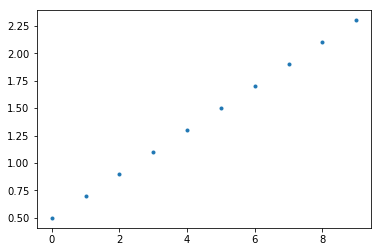

In [4]:
# create toy data and plot it
toy = np.arange(10).reshape(10,1)
target = toy*0.2 + 0.5
plot(toy, target, '.')
show()

In [5]:
# run lms and print results
print(lms_a(toy,target))
print(lms_sg(toy,target,iterations=10000,eta=0.001))

[[ 0.2]
 [ 0.5]]
[ 0.19676117  0.5216033 ]


[ 0.15647135  0.77661777] [[ 0.2]
 [ 0.5]]


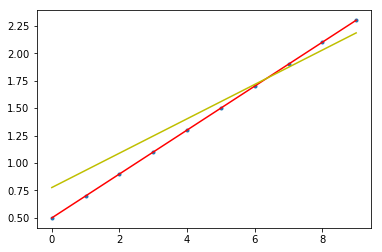

In [6]:
w_sg = lms_sg(toy,target,iterations=1000,eta=0.001)
w_a = lms_a(toy, target)
print(w_sg,w_a)
plot(toy,target,'.')
plot(toy, toy*w_a[0]+w_a[1],'r')
plot(toy, toy*w_sg[0]+w_sg[1],'y')
show()

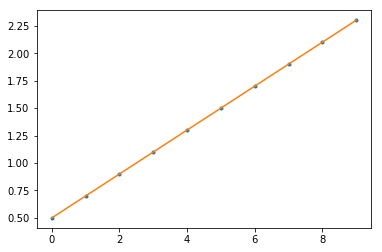

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(toy,target)
plot(toy,target,'.')
plot(toy,regr.predict(toy))
show()

## Shrinkage

In the case when we have more attributes than examples, small noise in the example can yield completely different solutions. 

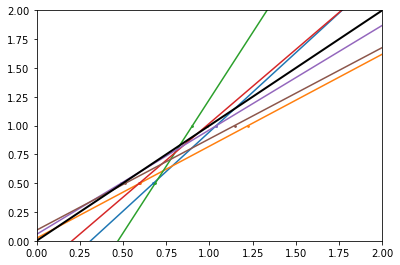

In [8]:
from sklearn import linear_model
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()
import pylab as pl 
pl.figure() 
ax = pl.axes([.12,.12,.8,.8])
ax.set_ylim(0,2)
ax.set_xlim(0,2)
np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test)) 
    pl.scatter(this_X, y, s=3)
    
regr.fit(X,y)
pl.plot(test,regr.predict(test), linewidth=2,color="black")

#### Solution: Shrinking the coefficents
In high-dimensional statistical learning, we try to shrink the coefficients so that they become minimal. This is called ridge regression. In a sense we add a-priori knowledge and restrict the number of possible regression solutions to those with very small weights.

By introducing this constraint, we avoid that our model overfits on noisy data. This form of a-priori knowledge, the bias of the model towards a particular solution, is called a regularization.

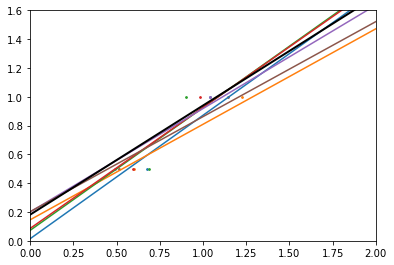

In [9]:
regr = linear_model.Ridge(alpha=.04)

pl.figure() 

ax = pl.axes([.12,.12,.8,.8])
ax.set_ylim(0,1.6)
ax.set_xlim(0,2)
np.random.seed(0)
for _ in range(6): 
     this_X = .1*np.random.normal(size=(2, 1)) + X
     regr.fit(this_X, y)
     pl.plot(test, regr.predict(test)) 
     pl.scatter(this_X, y, s=3) 
    
regr.fit(X,y)
pl.plot(test,regr.predict(test), linewidth=2,color="black")

### Determining House Prices

Consider that you get a good Job in Boston and that you want to buy a house there. Not for all regions the median value of houses is known, so you want to find a method that allows you to judge the value of a house and to see whether estate agent tries to fool you (or not).

The Boston Housing data contains such attributes in order to estimate the value of a region in the Boston suburps.  Variables are

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
9. TAX: full-value property-tax rate per \$10,000 
9. PTRATIO: pupil-teacher ratio by town 
9. B: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town 
9. LSTAT: % lower status of the population 
9. MEDV: Median value of owner-occupied homes in \$1000's

Attribute number 14. is the dependent variable or target attribute, i.e. the variable we want to predcit. Pracically we want to learn a function

$ MEDV = f(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT) $

or when we take $x$ as a vector of the attributes we simply write

$MEDV = f(x)$

In [10]:
import numpy as np
import sklearn.datasets as datasets
ds = datasets.load_boston()

In [11]:
print(ds.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [12]:
ds.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [13]:
print(ds.data.shape)
print(ds.target.shape)
print(ds.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


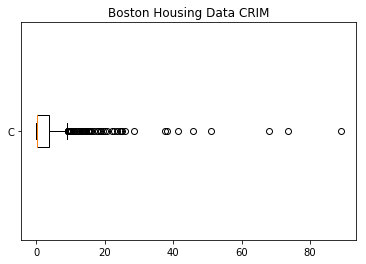

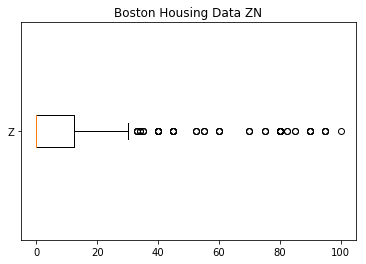

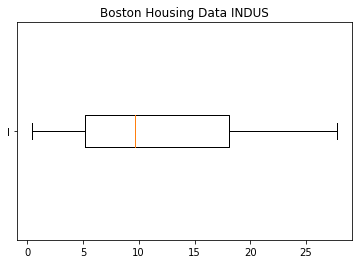

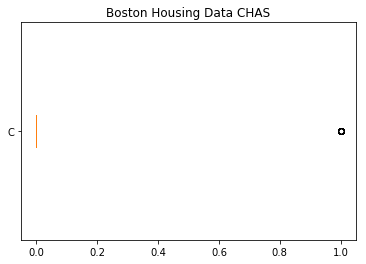

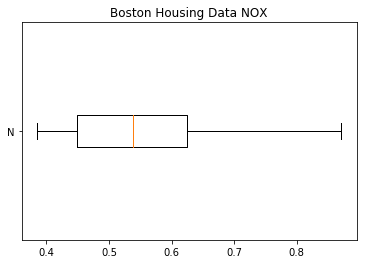

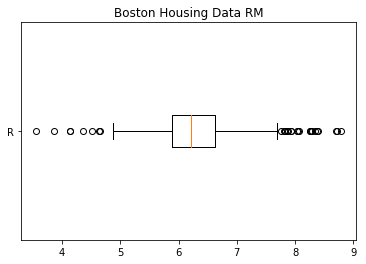

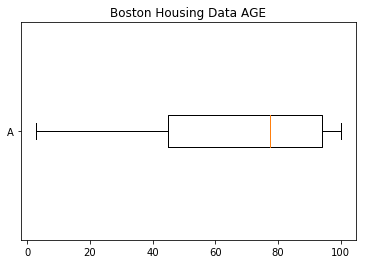

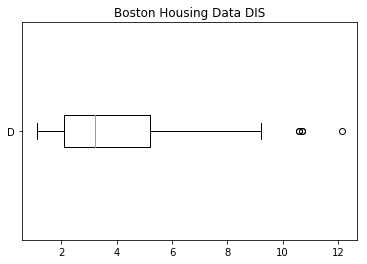

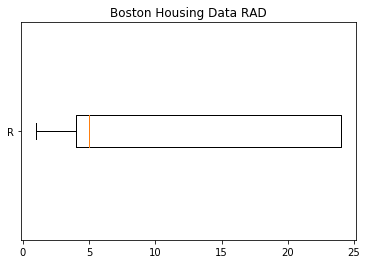

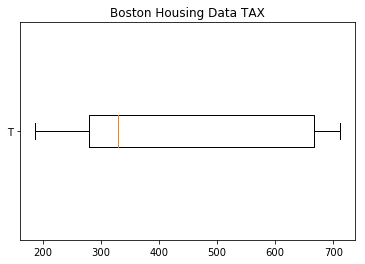

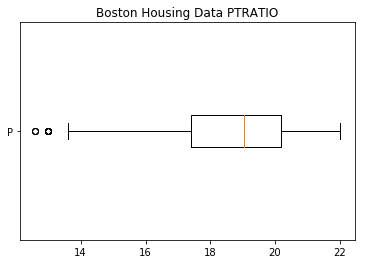

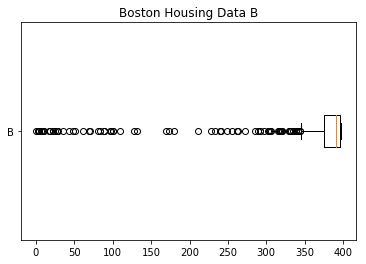

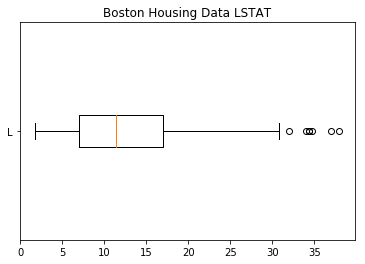

In [17]:
for i in range(ds.data.shape[1]):
    fig = pl.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.boxplot(ds.data[:,i],vert=False)
    ax1.set_title("Boston Housing Data "+ds.feature_names[i])
    ax1.set_yticklabels(ds.feature_names[i])
    #fig.show()

In [18]:
w = lms_sg(ds.data,ds.target,iterations=10000,eta=0.000001)
print ("Weights:", w)
print("Some better output (using python magic)")
for (feature,weight) in zip(ds.feature_names[0:12].tolist()+["w0"],w): print (feature,"\t",weight)

Weights: [ 0.49115636  0.18148776  0.85256518  1.00370198  0.99546724  0.99058676
 -0.04678101  0.93074793  0.9277082  -0.10031518  0.81118816  0.03023598
  0.39133428  0.99266998]
Some better output (using python magic)
CRIM 	 0.491156361341
ZN 	 0.181487760509
INDUS 	 0.852565175008
CHAS 	 1.0037019777
NOX 	 0.99546723855
RM 	 0.990586764945
AGE 	 -0.0467810133597
DIS 	 0.930747934441
RAD 	 0.927708203182
TAX 	 -0.100315181761
PTRATIO 	 0.811188163453
B 	 0.0302359820708
w0 	 0.391334276244


We have to tune $\eta$ in order to avoid divergence. This strongly depends on the scale of the attributes, i.e. large attributes yield large updates. So lets take a look on the scale of the attributes:

In [19]:
print (ds.feature_names)
print (np.min(ds.data,axis=0))
print (np.max(ds.data,axis=0))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   0.00000000e+00   4.60000000e-01   0.00000000e+00
   3.85000000e-01   3.56100000e+00   2.90000000e+00   1.12960000e+00
   1.00000000e+00   1.87000000e+02   1.26000000e+01   3.20000000e-01
   1.73000000e+00]
[  88.9762  100.       27.74      1.        0.871     8.78    100.
   12.1265   24.      711.       22.      396.9      37.97  ]


### Normalizing Attributes
In order to enhance parameter settings (in particular $\eta$) and to improve convergence we can rescale (aka centering/standardising) the data set by dividing each attribute through its range ($=max-min$) and subtracting the minimum $min$:

$$
  X = \frac{X-min(X)}{max(X)-min(X)}
$$

with $max(X)$ and $min(X)$ are column vectors containing the minimum and maximum values of an attribute and / being the element wise division. Such scaling/centering should be part of every preprocessing, as discussed in the Lecture [On the Data](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-data.pdf)

Hence, the attributes are scaled within the range [0:1]

In [20]:
X = ds.data
X_scaled = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
print (X_scaled)

[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   2.87234043e-01
    1.00000000e+00   8.96799117e-02]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    1.00000000e+00   2.04470199e-01]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   5.53191489e-01
    9.89737254e-01   6.34657837e-02]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.07891832e-01]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    9.91300620e-01   1.31070640e-01]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   8.93617021e-01
    1.00000000e+00   1.69701987e-01]]


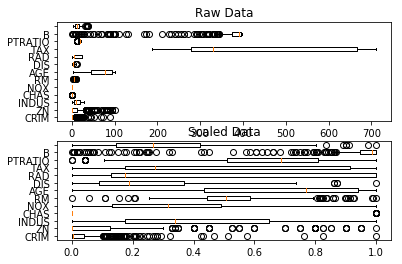

In [23]:
fig = pl.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.boxplot(ds.data,vert=False)
ax2 = fig.add_subplot(2,1,2)
ax2.boxplot(X_scaled,vert=False)
ax2.set_title("Scaled Data")
ax1.set_title("Raw Data")
ax2.set_yticklabels(ds.feature_names[0:12])
ax1.set_yticklabels(ds.feature_names[0:12])
#fig.show()

In [24]:
# goodness of fit by RSS
def gof(X,w,target):
    num_points = X.shape[0]
    X = np.concatenate([X,np.ones(num_points).reshape(num_points,1)],axis=1)
    return np.mean((np.dot(X,w)-target)**2)

21.8977792177
[235.09056034426237, 93.379152181852405, 44.435095014531917, 29.741353860838615, 24.836465620746683, 36.021215660699362]


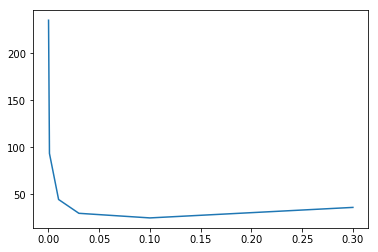

In [25]:
print(gof(ds.data,lms_a(ds.data,ds.target),ds.target))
etas = [0.0001,0.001,0.01,0.03,0.1,0.3]
gofs = []
for eta in etas:
    w = lms_sg(X_scaled,ds.target,iterations=1000,eta=eta)
    gofs.append(gof(X_scaled,w,ds.target))

plot(etas,gofs) #plotting comparing different etas and their goodness of fit
print (gofs)

[42.616796540613564, 25.292583066055638, 23.380380568378353, 31.822192324157946, 25.368029574428206, 22.257669239849829, 24.506488261176273, 23.503955956367623]


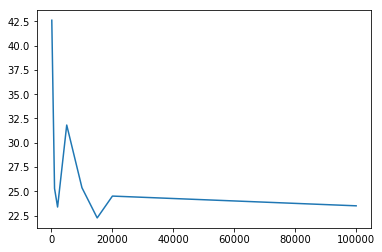

In [26]:
iterations = [100,1000,2000,5000,10000,15000,20000,100000]
gofs = []
for iteration in iterations:
    w = lms_sg(X_scaled,ds.target,iterations=iteration,eta=0.1)
    gofs.append(gof(X_scaled,w,ds.target))
plot(iterations,gofs) #plotting comparing different etas and their goodness of fit
print (gofs)